<a href="https://colab.research.google.com/github/xs2farooq/bth-ml-course/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

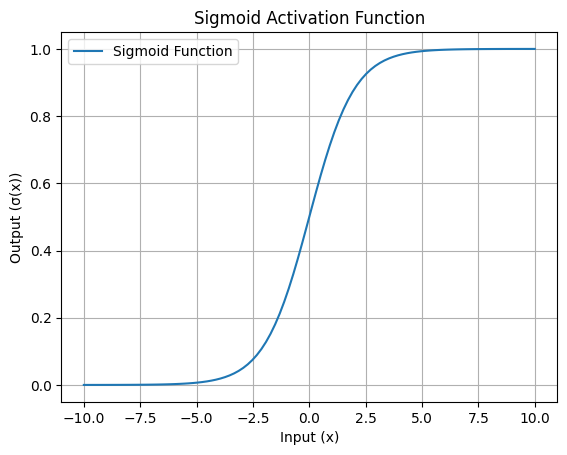

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate data
x_values = np.linspace(-10, 10, 100)
y_values = sigmoid(x_values)

# Plot the Sigmoid function
plt.plot(x_values, y_values, label='Sigmoid Function')
plt.title('Sigmoid Activation Function')
plt.xlabel('Input (x)')
plt.ylabel('Output (σ(x))')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

# Define the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of the Sigmoid function (for backpropagation)
def sigmoid_derivative(z):
    return z * (1 - z)

# Training dataset with 3 features: hours of study, hours of sleep, number of practice tests
# The last column is the target: 1 if the student passed, 0 if they failed
training_inputs = np.array([[5, 8, 3],
                            [1, 2, 1],
                            [10, 7, 5],
                            [7, 6, 4],
                            [2, 8, 2],
                            [9, 4, 3]])

training_outputs = np.array([[1],
                             [0],
                             [1],
                             [1],
                             [0],
                             [1]])

# Initialize weights and biases
np.random.seed(42)
input_layer_neurons = training_inputs.shape[1]
print(f"input_layer_neurons: {input_layer_neurons}")
hidden_layer_neurons = 4
output_neurons = 1

# Random weights and biases initialization
weights_input_hidden = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
print(f"weights_input_hidden: {weights_input_hidden}")
weights_hidden_output = np.random.uniform(size=(hidden_layer_neurons, output_neurons))
print(f"weights_hidden_output: {weights_hidden_output}")
bias_hidden = np.random.uniform(size=(1, hidden_layer_neurons))
print(f"bias_hidden: {bias_hidden}")
bias_output = np.random.uniform(size=(1, output_neurons))
print(f"bias_output: {bias_output}")

# Set learning rate and number of iterations
learning_rate = 0.1
iterations = 10000

# Training the neural network
for _ in range(iterations):
    # Forward propagation
    hidden_layer_input = np.dot(training_inputs, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    predicted_output = sigmoid(output_layer_input)

    # Compute error
    error = training_outputs - predicted_output

    # Backpropagation
    d_predicted_output = error * sigmoid_derivative(predicted_output)

    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    weights_input_hidden += training_inputs.T.dot(d_hidden_layer) * learning_rate
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

# Testing with a new input
new_input = np.array([4, 9, 3])
hidden_layer_input = np.dot(new_input, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)

output_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
predicted_output = sigmoid(output_layer_input)

print(f"Prediction for input [4, 9, 3]: {predicted_output[0][0]}")


In [ ]:
import numpy as np

# Without setting a seed
print("Without setting a seed:")
for _ in range(3):
    print(np.random.rand())

# Setting a seed
np.random.seed(42)
print("\nWith seed set to 42:")
for _ in range(3):
    print(np.random.rand())

# Resetting the seed to 42 and generating the same sequence again
np.random.seed(42)
print("\nWith seed reset to 42:")
for _ in range(3):
    print(np.random.rand())


Without setting a seed:
0.5986584841970366
0.15601864044243652
0.15599452033620265

With seed set to 42:
0.3745401188473625
0.9507143064099162
0.7319939418114051

With seed reset to 42:
0.3745401188473625
0.9507143064099162
0.7319939418114051


In [ ]:
# Define the input features
study_hours = 4
sleep_hours = 7

# Initialize weights and bias
w1 = 0.5
w2 = 0.5
b = -1

# Define the step function as the activation function
def step_function(x):
    return 1 if x >= 0 else 0

# Calculate the weighted sum
z = w1 * study_hours + w2 * sleep_hours + b

# Get the output using the step function
output = step_function(z)

# Print the result
print("The student will pass." if output == 1 else "The student will fail.")


The student will pass.


In [20]:
import numpy as np

# Define pre-trained weights and bias
W = np.array([0.4, -0.2])
B = np.array([-1.5])

# Define the step function
def step_function(z):
    return np.where(z >= 0, 1, 0)

# Function to predict based on study hours and sleep hours
def predict_pass_exam(x1, x2):
    Z = np.dot(W, np.array([x1, x2])) + B
    prediction = step_function(Z)
    return prediction

# Main function to take user input and make predictions
def main():
    # Take user input for study hours and sleep hours
    study_hours = float(input("Enter study hours: "))
    sleep_hours = float(input("Enter sleep hours: "))

    # Predict using the pre-trained model
    prediction = predict_pass_exam(study_hours, sleep_hours)

    # Output the prediction
    if prediction == 1:
        print(f"With {study_hours} hours of study and {sleep_hours} hours of sleep, the student will pass the exam.")
    else:
        print(f"With {study_hours} hours of study and {sleep_hours} hours of sleep, the student will not pass the exam.")

if __name__ == "__main__":
    main()


Enter study hours: 4
Enter sleep hours: 8
With 4.0 hours of study and 8.0 hours of sleep, the student will not pass the exam.
